### Clustering Eurovision Finalists: A Machine Learning Approach
This notebook performs clustering on Eurovision finalists' data using unsupervised learning techniques such as PCA, KMeans, and Silhouette Analysis.

#### Install Required Libraries

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install pycountry

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

#### Load and Prepare

In [3]:
df = pd.read_csv('Data/finalists_cleaned.csv')

####  Select and Encode Features
Select important features for clustering.
One-hot encode categorical columns (country, style) to make them numeric.

In [7]:
# Load and select relevant columns
df_cluster = df[['year', 'country', 'style', 'final_total_points']].copy()

In [9]:
# One-hot encode categorical variables
df_cluster = pd.get_dummies(df_cluster, columns=['country', 'style'])

In [11]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            358 non-null    int64  
 1   final_total_points              358 non-null    float64
 2   country_Albania                 358 non-null    bool   
 3   country_Armenia                 358 non-null    bool   
 4   country_Australia               358 non-null    bool   
 5   country_Austria                 358 non-null    bool   
 6   country_Azerbaijan              358 non-null    bool   
 7   country_Belarus                 358 non-null    bool   
 8   country_Belgium                 358 non-null    bool   
 9   country_Bosnia and Herzegovina  358 non-null    bool   
 10  country_Bulgaria                358 non-null    bool   
 11  country_Croatia                 358 non-null    bool   
 12  country_Cyprus                  358 

#### Scale the data

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


#### Reduce Dimensions with PCA
Use Principal Component Analysis to reduce the data to 2 dimensions for visualization and clustering.

In [17]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_scaled) 


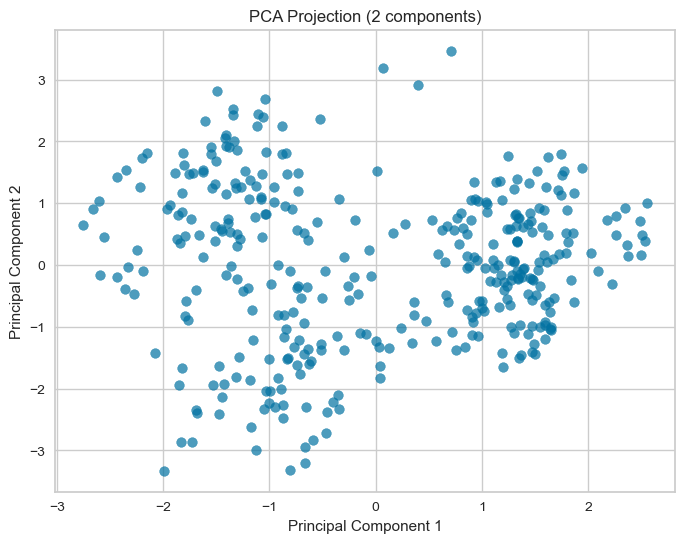

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2 components)')
plt.grid(True)
plt.show()

#### Find Optimal K (Elbow Method)

Calculate distortion (intra-cluster distances) for different values of k to determine the best number of clusters.

In [ ]:
distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X)
    # Calculate average minimum distance to cluster centers
    dist = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    distortions.append(dist)

print("Distortion values:", distortions)


#### Plot the Elbow Curve
Visualize distortion vs. cluster count to identify the "elbow" — the optimal number of clusters.

In [ ]:
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

Elbow method for optimal K, means we are looking for the best amount clusters. This indicates the we should try 3,4 or5 might be best suede for or model.                                                                                                                                           

####  Train KMeans Model with Optimal K

In [ ]:
# Choose number of clusters
n_clusters =3
model2 = KMeans(n_clusters=n_clusters, random_state=42)

#### Evaluate Clustering with Silhouette Score


In [ ]:
visualizer = SilhouetteVisualizer(model2, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
#visualizer.show(outpath='Images/silhouette_plot.png', clear_figure=True) ## used for storing the image

We tried with, 3,4,5 clusters, but found 3 to be best for our model. When we used 4 and 5 we had many line below zero indacating that some cluser are assigned in the wrong cluster.

####  Clean the Original Dataset
Drop unnecessary columns from the original dataset to focus on relevant information.

In [ ]:
# List of columns to drop
to_drop = [
    'final_draw_position',
    'final_televote_points',
    'final_jury_points',
    'final_televote_votes',
    'final_jury_votes',
    'final_place'
]

# Drop them from df in‑place
df.drop(columns=to_drop, inplace=True)

# Now df only has the 5 columns you need
print(df.head())


####  Assign Cluster Labels to Original Data
Fit the model and assign each record to a cluster. Store the cluster labels in the dataframe.

In [ ]:
# 1. Fit the model and get cluster assignments
clusters = model2.fit_predict(X)
# 2. Save them into your original df
df['Cluster'] = clusters
# 3. Now you can inspect the Cluster column:
df.head()

In [ ]:
print(df.std(numeric_only=True))

In [ ]:

plt.hist(df['final_total_points'], bins=30, edgecolor='black')
plt.title('Distribution of Final Total Points')
plt.xlabel('Final Total Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### View Unique Cluster Labels

In [ ]:
unique_clusters = df['Cluster'].unique()
print("Cluster labels:", unique_clusters)

#### Save the Clustered Data

In [ ]:
df.to_csv('Data/finalists_clustered.csv', index=False)